# Data Science Modelling 2

## Import Libraries and Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('fraudTrain.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## K Means

Choose 'lat' and 'long' to analysis clusters in location.

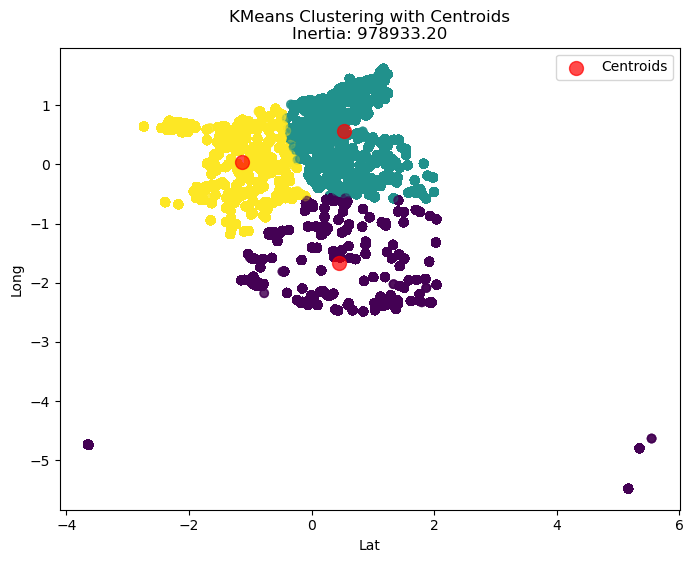

In [4]:
# Select the features for clustering
X = df[['lat','long']]

# Scale the features to have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=8)

# Fit the KMeans model to the data
kmeans = kmeans.fit(X_scaled)             

# Get the final locations of the centroids
Kmeans_centers = kmeans.cluster_centers_

# Calculate the sum of squared distances (SSE)
Kmeans_sse= kmeans.inertia_

# Scatter plot of data points and centroids
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.2)
plt.scatter(Kmeans_centers[:, 0], Kmeans_centers[:, 1], c='red', s=100, alpha=0.7, label='Centroids')
plt.title("KMeans Clustering with Centroids\nInertia: {:.2f}".format(Kmeans_sse))
plt.xlabel("Lat")
plt.ylabel("Long")
plt.legend()
plt.show()

## Evaluate K Means

### Elbow Method

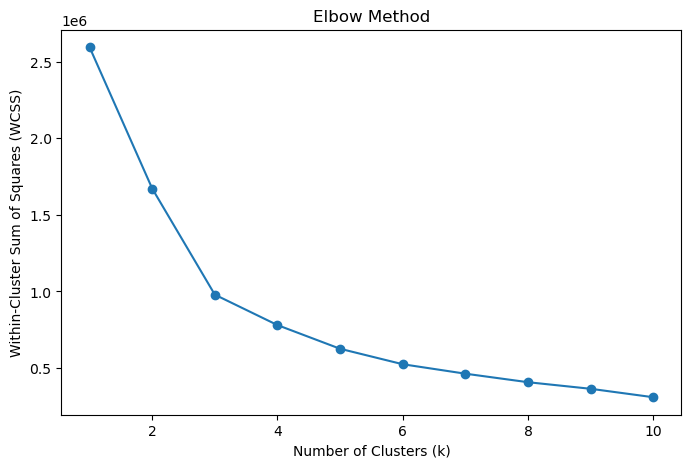

In [5]:
# Calculate the sum of squared distances (SSE) for different values of k
wcss = []
for k in range(1, 11):  # Trying k from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=8)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

### Silhouette Method

In [ ]:
# KMeans clustering with k-means++ initialization
kmeans_pp = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=8)
kmeans_pp.fit(X_scaled)

In [ ]:
#kmeans_pp_labels = kmeans_pp.labels_
kmeans_pp_labels = kmeans_pp.fit_predict(X)
kmeans_pp_silhouette = silhouette_score(X_scaled, kmeans_pp_labels)

In [ ]:
# KMeans clustering with random initialization
kmeans_random = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, random_state=8)
kmeans_random.fit(X_scaled)
kmeans_random_labels = kmeans_random.fit_predict(X)

In [ ]:
#kmeans_random_labels = kmeans_random.labels_
kmeans_random_silhouette = silhouette_score(X_scaled, kmeans_random_labels)

In [ ]:
# Scatter plot with k-means++ initialization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_pp_labels, cmap='viridis', alpha=0.2)
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], c='red', s=100, alpha=0.7, label='Centroids')
plt.title("KMeans - KMeans++ Initialization\nSilhouette Score: {:.3f}".format(kmeans_pp_silhouette))
plt.xlabel("Lat")
plt.ylabel("Long")
plt.legend()

# Scatter plot with random initialization
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_random_labels, cmap='viridis', alpha=0.2)
plt.scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1], c='red', s=100, alpha=0.7, label='Centroids')
plt.title("KMeans - Random Initialization Clustering\nSilhouette Score: {:.3f}".format(kmeans_random_silhouette))
plt.xlabel("Lat")
plt.ylabel("Long")
plt.legend()

plt.tight_layout()
plt.show()

## DBScan

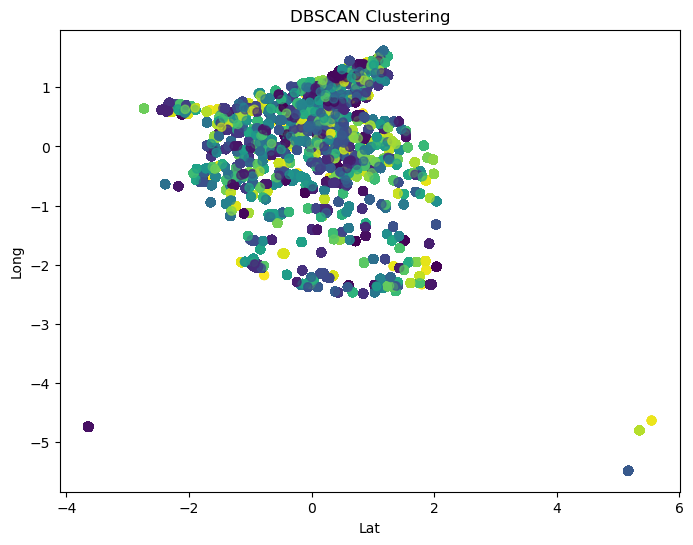

In [6]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("Lat")
plt.ylabel("Long")
plt.show()

### Evaluate DBScan

In [ ]:
# Calculate silhouette score for DBScan
silhouette_dbscan = silhouette_score(X, dbscan_labels)
print("Silhouette Score (DBScan):", silhouette_dbscan)